**Logistic Regresion**

In [1]:
import pandas as pd
import numpy as np
import os
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve

**Read Data File**

In [3]:
df=pd.read_csv("../data/data.csv")
print(df.shape)
df.head(10)

(863, 15)


,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0
5,5,23,8,0,44.0,0,1,14,31,19,12,3,1,0,0
6,6,105,8,1,34.0,0,1,14,31,19,12,3,1,0,0
7,7,13,8,1,37.0,1,0,14,31,19,12,3,1,6,0
8,8,13,8,1,39.0,1,0,14,31,19,12,3,1,5,0
9,9,13,8,1,56.0,1,0,14,31,19,12,3,1,4,0


**Understand the Data**

In [4]:
df.describe()

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.00000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,431.000000,76.645423,16.995365,0.849363,49.400000,0.181924,0.107764,12.13905,28.002317,18.298957,11.840093,2.993048,0.998841,0.995365,0.125145
std,249.270937,39.200264,7.809951,0.726062,15.079203,0.386005,0.310261,3.99787,7.473231,2.864064,1.183771,0.127251,0.034040,2.358767,0.331075
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,215.500000,45.000000,11.000000,0.000000,40.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
50%,431.000000,87.000000,18.000000,1.000000,49.400000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
75%,646.500000,110.000000,24.000000,1.000000,57.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,1.000000,0.000000
max,862.000000,138.000000,33.000000,2.000000,96.000000,1.000000,1.000000,24.00000,31.000000,19.000000,12.000000,3.000000,1.000000,15.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    863 non-null    int64  
 1   location      863 non-null    int64  
 2   country       863 non-null    int64  
 3   gender        863 non-null    int64  
 4   age           863 non-null    float64
 5   vis_wuhan     863 non-null    int64  
 6   from_wuhan    863 non-null    int64  
 7   symptom1      863 non-null    int64  
 8   symptom2      863 non-null    int64  
 9   symptom3      863 non-null    int64  
 10  symptom4      863 non-null    int64  
 11  symptom5      863 non-null    int64  
 12  symptom6      863 non-null    int64  
 13  diff_sym_hos  863 non-null    int64  
 14  result        863 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 101.3 KB


**Drop unnecessary attribute**

In [6]:
df.drop(columns=["Unnamed: 0"],inplace=True)
print(df.shape)

(863, 14)


**Split the data into Train, Test and Validate**

In [7]:
X=df.drop(columns="result")
Y=df["result"]
x_train,x_test_val,y_train,y_test_val=train_test_split(X,Y,test_size=0.3,train_size=0.7,random_state=42)
x_test,x_val,y_test,y_val=train_test_split(x_test_val,y_test_val,train_size=0.5,random_state=30)
print(len(x_train))
print(len(x_test))
print(len(x_val))

604
129
130


**Feature Scaling**

In [8]:
############ MnMax scaled ###################
Scaler=MinMaxScaler()
Scaler.fit(x_train)
x_train_scaled=Scaler.transform(x_train)
x_train_scaled=pd.DataFrame(x_train_scaled)
x_train_scaled.columns=x_train.columns
############ Standard scaled ###################
Scaler2=StandardScaler()
Scaler2.fit(x_train)
x_train_scaled2=Scaler.transform(x_train)
x_train_scaled2=pd.DataFrame(x_train_scaled2)
x_train_scaled2.columns=x_train.columns
########################################## 
print(x_train_scaled.head())
print("--------------------------------------------------------------------------------------------")
print(x_train_scaled2.head())

   location   country  gender       age  vis_wuhan  from_wuhan  symptom1  \
0  0.782609  0.727273     1.0  0.487912        0.0         0.0  0.583333   
1  0.007246  0.545455     0.5  0.439560        0.0         1.0  0.250000   
2  0.768116  0.696970     0.0  0.472527        0.0         0.0  0.583333   
3  0.782609  0.727273     1.0  0.487912        0.0         0.0  0.583333   
4  0.318841  0.545455     0.5  0.000000        0.0         0.0  0.250000   

   symptom2  symptom3  symptom4  symptom5  symptom6  diff_sym_hos  
0  1.000000       1.0       1.0       1.0       0.0      0.263158  
1  1.000000       1.0       1.0       1.0       0.0      0.473684  
2  1.000000       1.0       1.0       1.0       0.0      0.736842  
3  1.000000       1.0       1.0       1.0       0.0      0.263158  
4  0.225806       1.0       1.0       1.0       0.0      0.421053  
--------------------------------------------------------------------------------------------
   location   country  gender       age  v

**Model Training**

In [9]:
model = LogisticRegression(max_iter=120)
model.fit(x_train_scaled, y_train)
""" note : max_iter (no. of optimization iterations done by model to find global minimum) is set by trial and error
           in order to get best results
"""


' note : max_iter (no. of optimization iterations done by model to find global minimum) is set by trial and error\n           in order to get best results\n'

**Model Test**

In [10]:
x_test_scaled=pd.DataFrame(Scaler.transform(x_test))  #apply transformation to the test data directly with the same parameters of the training data to avoid data leakage
x_test_scaled.columns=x_test.columns
y_predict=model.predict(x_test_scaled)


In [11]:
accuracy=accuracy_score(y_test,y_predict)
print(accuracy)
confusion_mat=confusion_matrix(y_test,y_predict)
print(confusion_mat)



0.8992248062015504
[[109   0]
 [ 13   7]]


In [12]:
x_val_scaled=pd.DataFrame(Scaler.transform(x_val))
x_val_scaled.columns=x_val.columns
y_val_predict=model.predict(x_val_scaled)

confusion_mat_val=confusion_matrix(y_val,y_val_predict)
print(confusion_mat_val)
acc2=accuracy_score(y_val,y_val_predict)
print(acc2)

[[117   1]
 [ 10   2]]
0.9153846153846154


**Model Ealuation**

Precision: 0.6666666666666666
Recall: 0.16666666666666666
F1 Score: 0.26666666666666666
ROC AUC Score: 0.5790960451977402
Confusion Matrix:


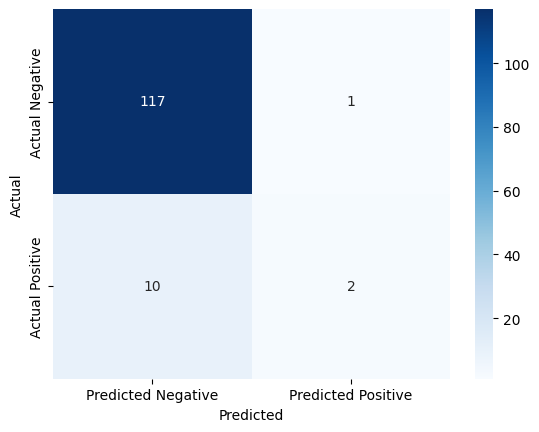


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       118
           1       0.67      0.17      0.27        12

    accuracy                           0.92       130
   macro avg       0.79      0.58      0.61       130
weighted avg       0.90      0.92      0.89       130



In [13]:
# Calculate evaluation metrics
precision = precision_score(y_val, y_val_predict)
recall = recall_score(y_val, y_val_predict)
f1 = f1_score(y_val, y_val_predict)
roc_auc = roc_auc_score(y_val, y_val_predict)

# Display the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_val, y_val_predict)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
print(classification_report(y_val, y_val_predict))

**ROC Curve Results**

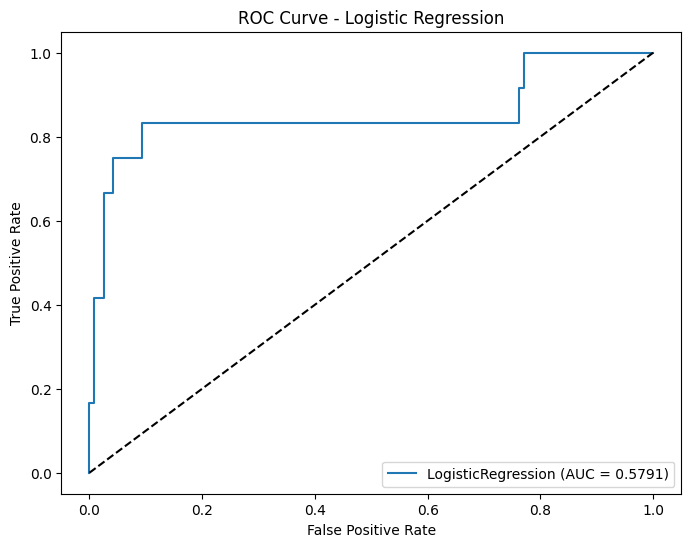

In [14]:
# Compute ROC curve
y_val_prob=model.predict_proba(x_val_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'LogisticRegression (AUC = {roc_auc:.4f})')
plt.plot([0,1], [0,1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

**Export the Model**

In [15]:
# Define the directory to save the model
model_dir = 'models/logistic_regression/'

# Create the directory if it doesn't exist
os.makedirs(model_dir, exist_ok=True)

# Save the trained model
model_path = os.path.join(model_dir, 'logistic_regression_model.joblib')
joblib.dump(model, model_path)
print(f"Model saved to {model_path}")

# Also, save the scaler to ensure consistent preprocessing
scaler_path = os.path.join(model_dir, 'scaler.joblib')
joblib.dump(Scaler, scaler_path)
print(f"Scaler saved to {scaler_path}")

Model saved to models/logistic_regression/logistic_regression_model.joblib
Scaler saved to models/logistic_regression/scaler.joblib
